In [8]:
# Imports
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Predicting population using ARIMA and census data

In [9]:
# Read data from CSV and remove unnecessary columns
df = pd.read_csv('../data/CNA15-PopPerYearByAgeGroup.csv', index_col='Year')
df.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)

# We will need separate models for each age group
age_groups = np.array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years', '85 years and over'])

# 80/20 train test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size + 1], df[train_size:]

In [10]:
# Storing models for each age group
models = {}

# To be used in evaluation
forecasts = []
rmses = []

# Fit each model with a corresponding age group and record results
for ag in age_groups:
    y = train[ag]
    
    print('\nFitting ARIMA for Age Group: ', ag)
    model = pm.auto_arima(y, seasonal=False, stepwise=True, trace=True, max_p=5, max_q=5, max_d=2, max_order=5)
    models[ag] = model
    
    forecast = model.predict(n_periods=len(test[ag]))
    
    forecasts.append(forecast)
    rmses.append(root_mean_squared_error(test[ag], forecast))


Fitting ARIMA for Age Group:  Under 1 year
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=277.069, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=325.526, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=320.244, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=275.926, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=319.861, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=274.924, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=277.241, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=269.232, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=266.662, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.488, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=267.698, Time=0.00 sec
 ARIMA(1,0,2)(0

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pred

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=355.770, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=305.637, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=356.409, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=304.310, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=305.969, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=296.820, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=296.528, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=301.178, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=297.182, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.181 seconds

Fitting ARIMA for Age Group:  5 - 9 years
Performing stepwise search to minimize aic
 ARIMA(2

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=300.042, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=299.951, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=309.297, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=302.423, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=297.695, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=298.957, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=299.038, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.276 seconds

Fitting ARIMA for Age Group:  15 - 19 years
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=306.188, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=366.125, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=360.151, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=305.116, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=359.797, Time=0.0

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=300.807, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=306.827, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=300.009, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=314.325, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=299.061, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=295.531, Time=0.01 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=296.271, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=295.831, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=303.141, Time=0.04 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=296.577, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.364 seconds

Fitting ARIMA for Age Group:  20 - 24 years
Performing stepwise search to minimize aic
 A

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=315.963, Time=0.02 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 0.352 seconds

Fitting ARIMA for Age Group:  25 - 29 years
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=359.343, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=354.351, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=315.128, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=317.021, Time=0.03 sec


C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=316.048, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=357.812, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=314.905, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=316.809, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=318.937, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=312.126, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=312.255, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=314.332, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=314.249, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=313.141, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=316.292, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.279 seconds

Fitting ARIMA for Age Group:  30 - 34 years
Performing stepwise search to minimize aic


C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=358.059, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=353.328, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=312.443, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=314.449, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=356.303, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=312.416, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=316.109, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=310.634, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=311.193, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=314.229, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=314.909, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pred

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=350.001, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=298.774, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=349.626, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=296.400, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=297.877, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=310.745, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.231 seconds

Fitting ARIMA for Age Group:  45 - 49 years
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.273, Time=0.00 sec


C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=348.412, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=300.557, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=296.463, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=349.858, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 0.292 seconds

Fitting ARIMA for Age Group:  50 - 54 years
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=351.191, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pred

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=267.031, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=267.795, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=267.353, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=267.095, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=272.234, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.094 seconds

Fitting ARIMA for Age Group:  60 - 64 years
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=258.365, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=259.312, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=256.724, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=258.371, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=254.802, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=254.224, Time=0.01 se

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=255.823, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=254.687, Time=0.01 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 0.314 seconds

Fitting ARIMA for Age Group:  65 - 69 years
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=254.356, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=255.565, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255.746, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=253.619, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=257.637, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.080 seconds

Fitting ARIMA for Age Group:  70 - 74 years
Performing stepwise search to minimize aic


C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pred

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=245.095, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=247.107, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=247.180, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.291, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=250.686, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.092 seconds

Fitting ARIMA for Age Group:  75 - 79 years
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=235.741, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=237.035, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=237.309, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=241.665, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=239.152, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pred


Fitting ARIMA for Age Group:  80 - 84 years
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=230.788, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=230.422, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=228.806, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=235.349, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=230.392, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=238.423, Time=0.00 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.140 seconds

Fitting ARIMA for Age Group:  85 years and over
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=227.600, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22

C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\bayan\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
# Printing metrics
for forecast, ag, rmse in zip(forecasts, age_groups, rmses):
    print(f'{ag} forecast:\n{forecast}')
    print(f'RMSE: {rmse}\n')

Under 1 year forecast:
13    61532.033180
14    61852.204777
15    61852.204777
16    61852.204777
dtype: float64
RMSE: 6358.00575457292

1 - 4 years forecast:
13    241338.404838
14    246128.884756
15    246128.884756
16    246128.884756
dtype: float64
RMSE: 24078.462577843613

5 - 9 years forecast:
13    257240.091560
14    269324.440753
15    291595.686161
16    317039.914942
dtype: float64
RMSE: 26186.623872497006

10 - 14 years forecast:
13    267550.682591
14    268337.877677
15    279767.672123
16    293455.761124
dtype: float64
RMSE: 19708.609453528323

15 - 19 years forecast:
13    297952.413077
14    273254.557910
15    262126.284332
16    254043.489499
dtype: float64
RMSE: 28881.090242880593

20 - 24 years forecast:
13    356195.768350
14    351211.135335
15    349502.852398
16    345421.036097
dtype: float64
RMSE: 46738.73168140677

25 - 29 years forecast:
13    317037.950352
14    304056.348516
15    287573.415454
16    272854.928513
dtype: float64
RMSE: 51952.96230747711

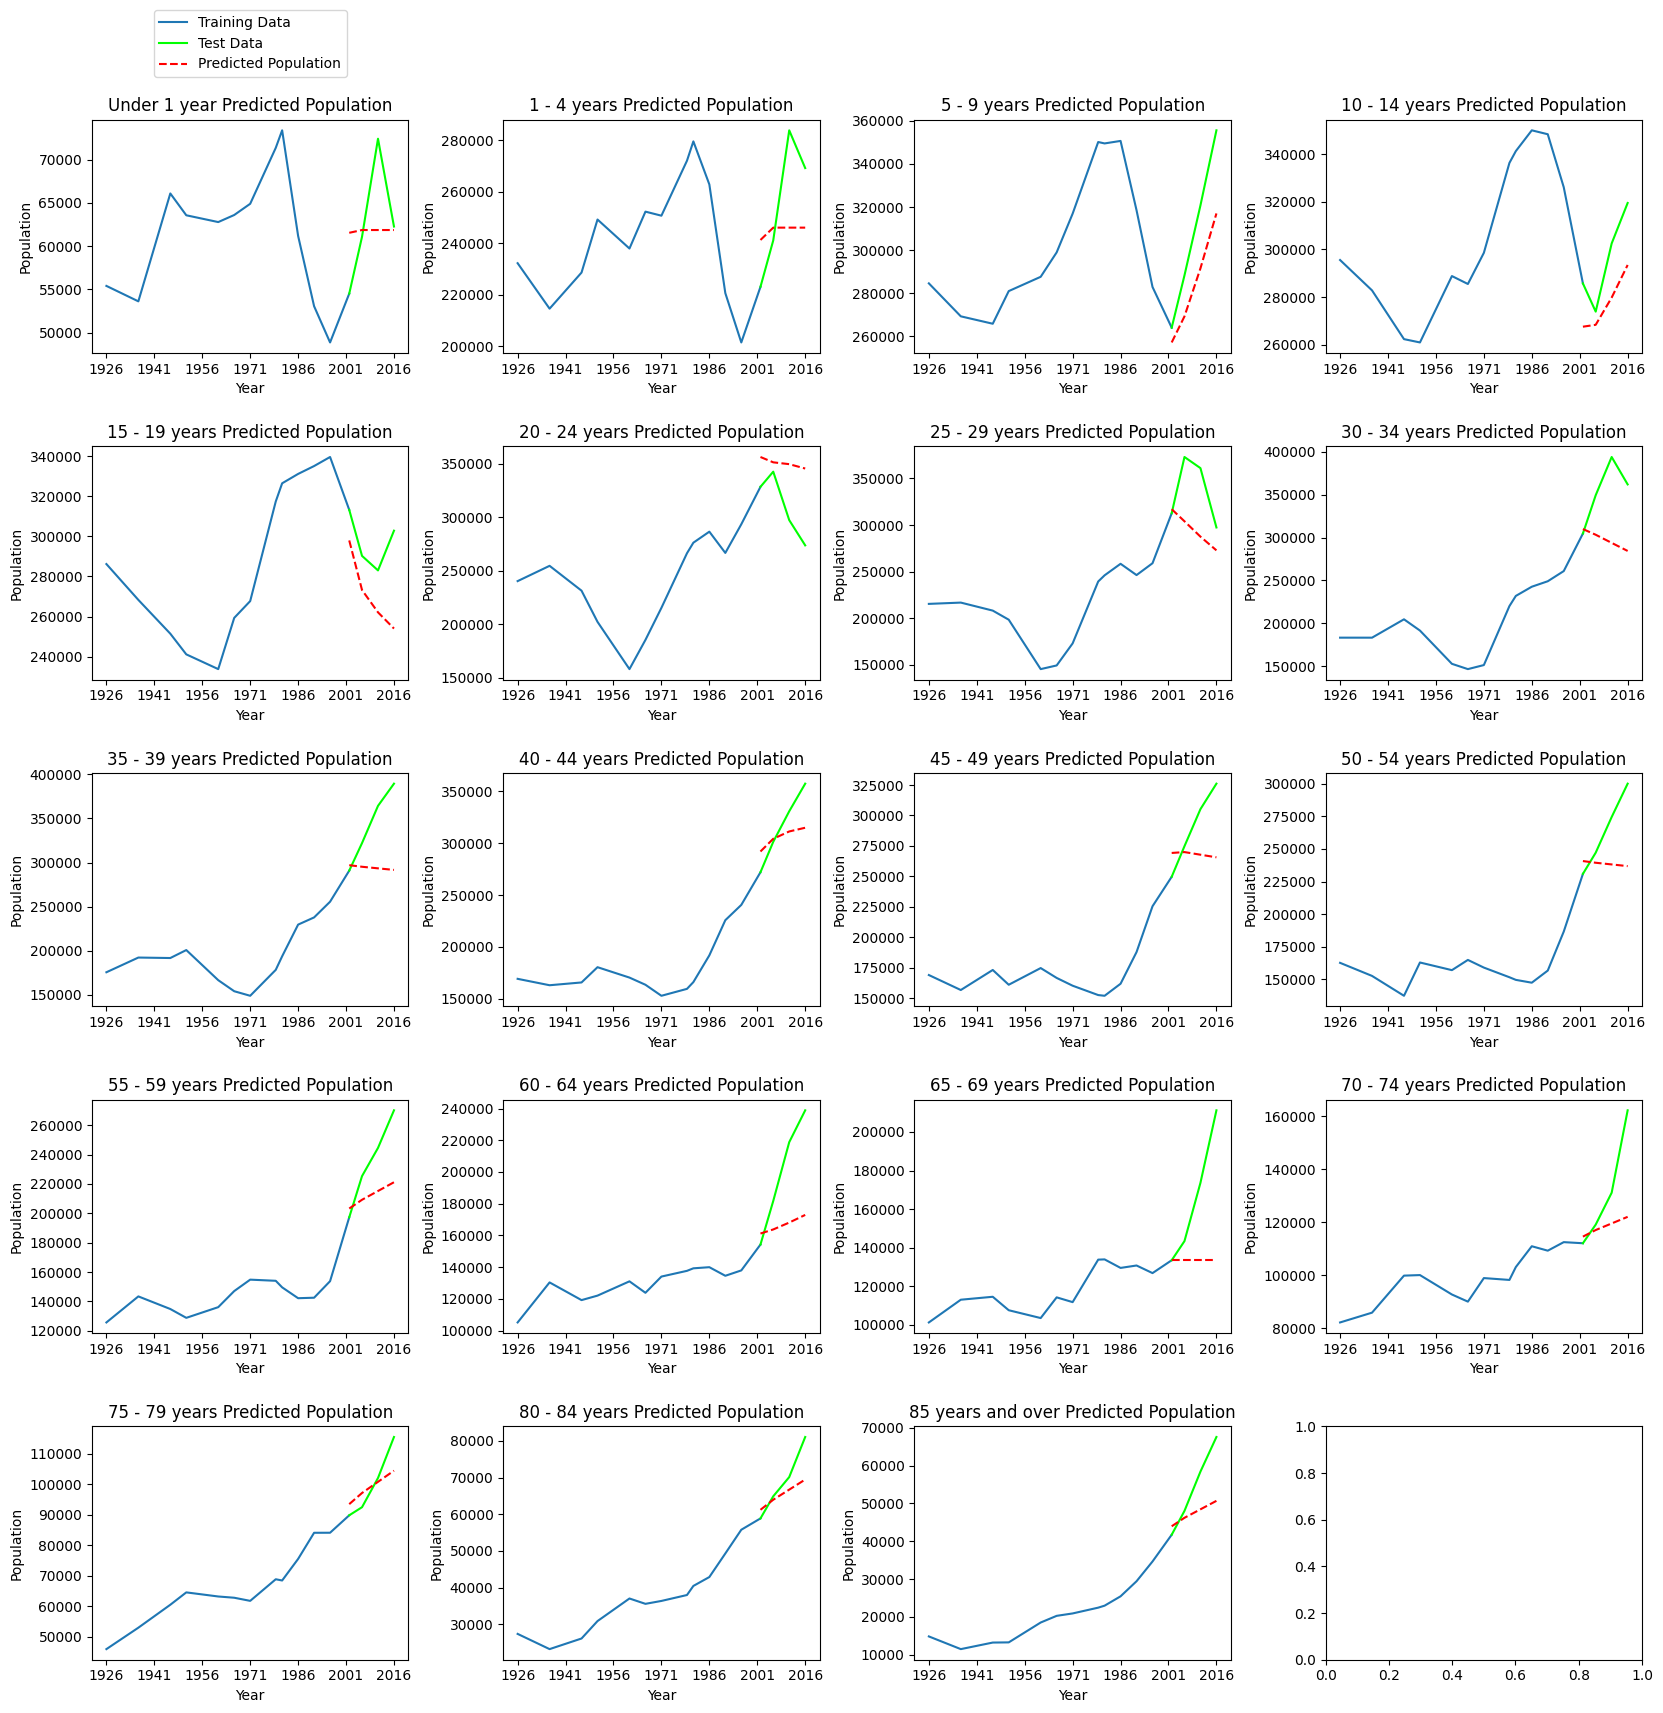

In [12]:
# Visualising predicted population against actual population

# Create a 4x5 grid for our 19 plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Custom x-ticks
x_ticks = [1926, 1941, 1956, 1971, 1986, 2001, 2016]

for ag, forecast, ax in zip(age_groups, forecasts, axes):
    y = train[ag]
    y_test = test[ag]
    
    # Actual population used for training
    ax.plot(train.index, y, label='Training Data')
    # Actual population used for testing
    ax.plot(test.index, y_test, label='Test Data', color='lime')
    # Predicted population
    ax.plot(test.index, forecast, label=f'Predicted Population', color='red', linestyle='--')
    ax.set_title(f'{ag} Predicted Population')
    ax.set_xlabel('Year')
    ax.set_xticks(x_ticks)
    ax.set_ylabel('Population')
    # ax.set_ylim(bottom=0)

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

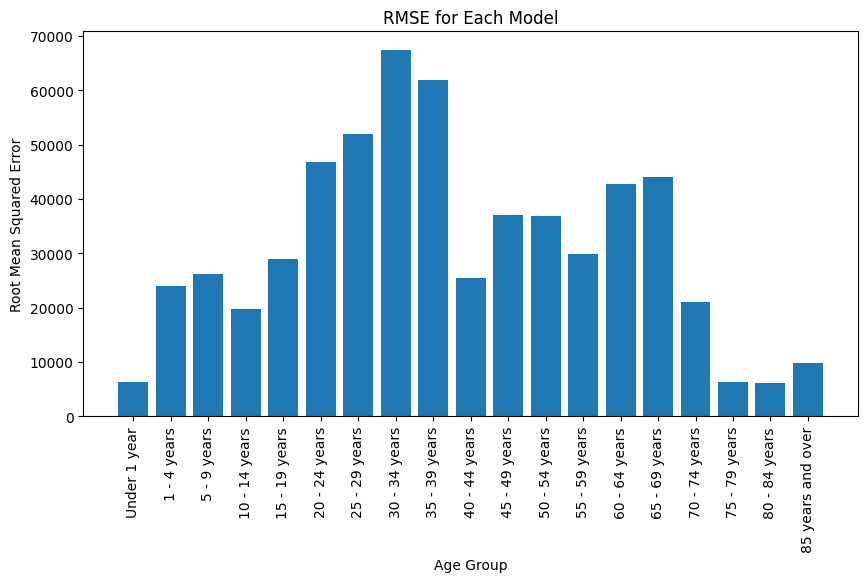

Average RMSE: 31184.08
Average RMSE for elderly populations: 17476.75


In [13]:
# Plotting each model's root mean squared error (RMSE)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), rmses)
plt.title('RMSE for Each Model')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_rmse = round(sum(rmses) / len(rmses), 2)
print('Average RMSE:', avg_rmse)

avg_rmse = round(sum(rmses[-5:]) / 5, 2)
print('Average RMSE for elderly populations:', avg_rmse)

### Using the supplemented dataset
The supplemented dataset combines census data with population estimates for each year to get a more balanced dataset with more data points. The estimates are adequately accurate against actual data hence why I am using it here.

In [14]:
# Read data from CSV and remove unnecessary columns
df = pd.read_csv('../data/PopByAgeGroupSupplemented.csv', parse_dates=['Year'], index_col='Year')
df.drop(columns=['STATISTIC', 'UNIT'], inplace=True)

# 80/20 train test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size + 1], df[train_size:]

In [15]:
# Storing models for each age group
models = {}

# To be used in evaluation
forecasts = []
rmses = []

# Fit each model with a corresponding age group and record results
for ag in age_groups:
    y = train[ag]
    
    model = pm.auto_arima(y, seasonal=False, stepwise=True, trace=True, max_p=5, max_q=5, max_d=2, max_order=5)
    models[ag] = model
    
    forecast = model.predict(n_periods=len(test[ag]))
    
    forecasts.append(forecast)
    rmses.append(root_mean_squared_error(test[ag], forecast))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=678.096, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=270.807, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=269.932, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=271.100, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=274.880, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.441 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] 

In [16]:
# Printing metrics
for forecast, ag, rmse in zip(forecasts, age_groups, rmses):
    print(f'{ag} forecast:\n{forecast}')
    print(f'RMSE: {rmse}\n')

Under 1 year forecast:
2011-01-01    76.041440
2012-01-01    76.930090
2013-01-01    77.615098
2014-01-01    78.136067
2015-01-01    78.524910
2016-01-01    78.807345
2017-01-01    79.004094
2018-01-01    79.131856
2019-01-01    79.204088
2020-01-01    79.231633
2021-01-01    79.223229
2022-01-01    79.185917
2023-01-01    79.125372
2024-01-01    79.046164
2025-01-01    78.951978
Freq: YS-JAN, dtype: float64
RMSE: 16.752076051350226

1 - 4 years forecast:
2011-01-01    279.939309
2012-01-01    285.958665
2013-01-01    290.285108
2014-01-01    293.040665
2015-01-01    294.304361
2016-01-01    294.147010
2017-01-01    292.649958
2018-01-01    289.914256
2019-01-01    286.063988
2020-01-01    281.245986
2021-01-01    275.627259
2022-01-01    269.390991
2023-01-01    262.731639
2024-01-01    255.849560
2025-01-01    248.945429
Freq: YS-JAN, dtype: float64
RMSE: 19.894235875014438

5 - 9 years forecast:
2011-01-01    318.976826
2012-01-01    322.743102
2013-01-01    325.886937
2014-01-01   

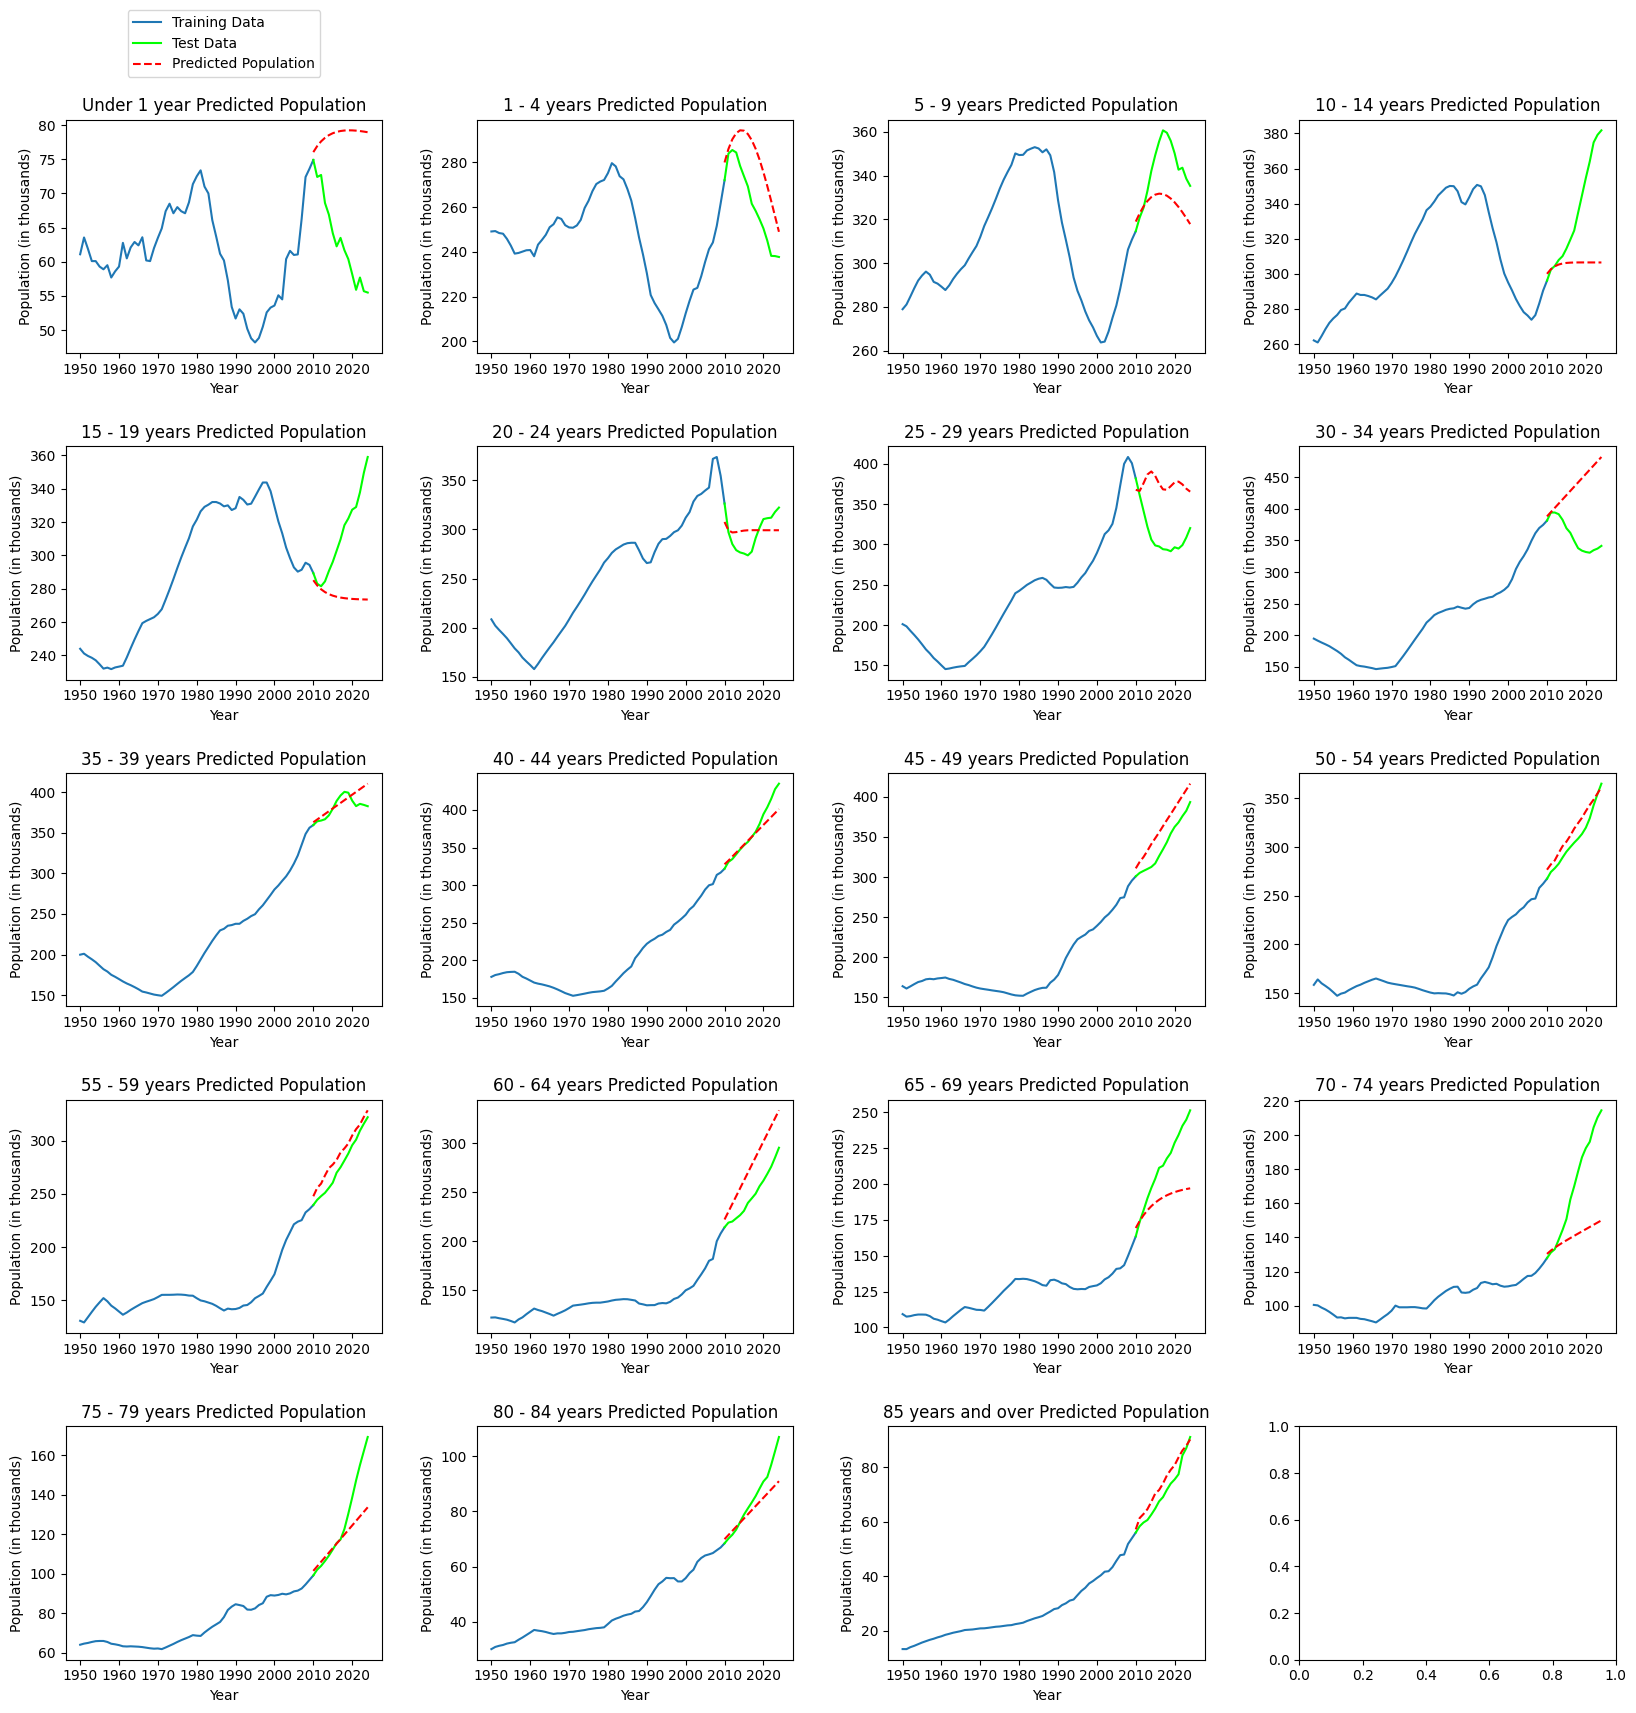

In [17]:
# Visualising predicted population against actual population

# Create a 4x5 grid for our 19 plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ag, forecast, ax in zip(age_groups, forecasts, axes):
    y = train[ag]
    y_test = test[ag]
    
    # Actual population used for training
    ax.plot(y.index, y, label='Training Data')
    # Actual population used for testing
    ax.plot(test.index, y_test, label='Test Data', color='lime')
    # Predicted population
    ax.plot(test.index, forecast, label=f'Predicted Population', color='red', linestyle='--')
    ax.set_title(f'{ag} Predicted Population')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population (in thousands)')
    # ax.set_ylim(bottom=0)

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

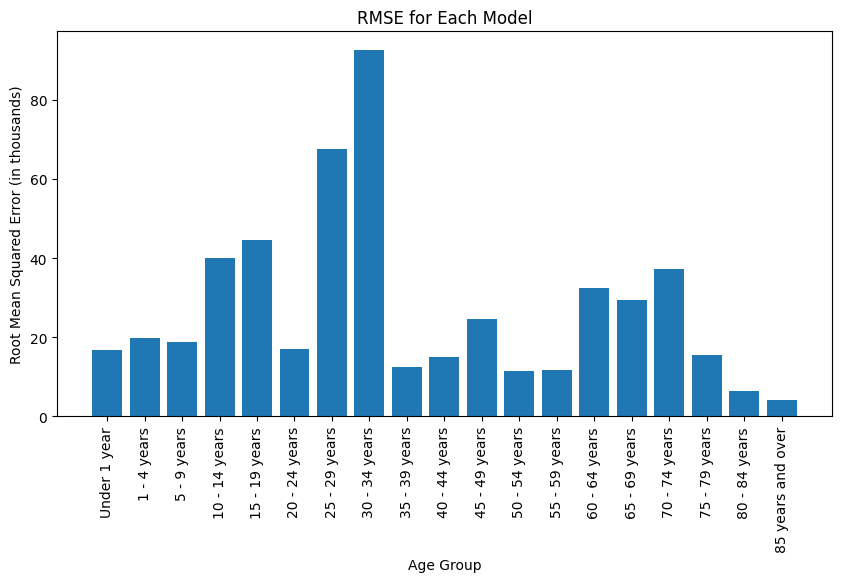

Average RMSE: 27260
Average RMSE for elderly populations: 18550


In [18]:
# Plotting each model's root mean squared error (RMSE)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), rmses)
plt.title('RMSE for Each Model')
plt.ylabel('Root Mean Squared Error (in thousands)')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_rmse = round(sum(rmses) / len(rmses), 2)
print('Average RMSE:', int(avg_rmse * 1000))

avg_rmse = round(sum(rmses[-5:]) / 5, 2)
print('Average RMSE for elderly populations:', int(avg_rmse * 1000))

### Predictions against population projections from 2022
These projections project a population number for each group for 2022 until 2057 in 5 year intervals
There are three types of projections: M1 (high net migration), M2 (moderate net migration), and M3 (low net migration).

In [19]:
# Read data from CSV and remove unnecessary columns
df_projections = pd.read_csv('../data/PEC23-ProjectedPopByAgeGroup.csv', parse_dates=['Year'], index_col='Year')
df_projections.drop(columns=['Statistic', 'UNIT'], inplace=True)

# Getting the three different methods of projection
m1 = df_projections[df_projections['Criteria for Projection'] == 'Method - M1']
m2 = df_projections[df_projections['Criteria for Projection'] == 'Method - M2']
m3 = df_projections[df_projections['Criteria for Projection'] == 'Method - M3']

In [20]:
# Making predictions for 2011 - 2057 inclusive
predictions = []
for ag in age_groups[2:]:
    prediction = models[ag].predict(n_periods=47)
    predictions.append(prediction)
    
x_ticks = pd.to_datetime(['2020', '2030', '2040', '2050', '2060'])

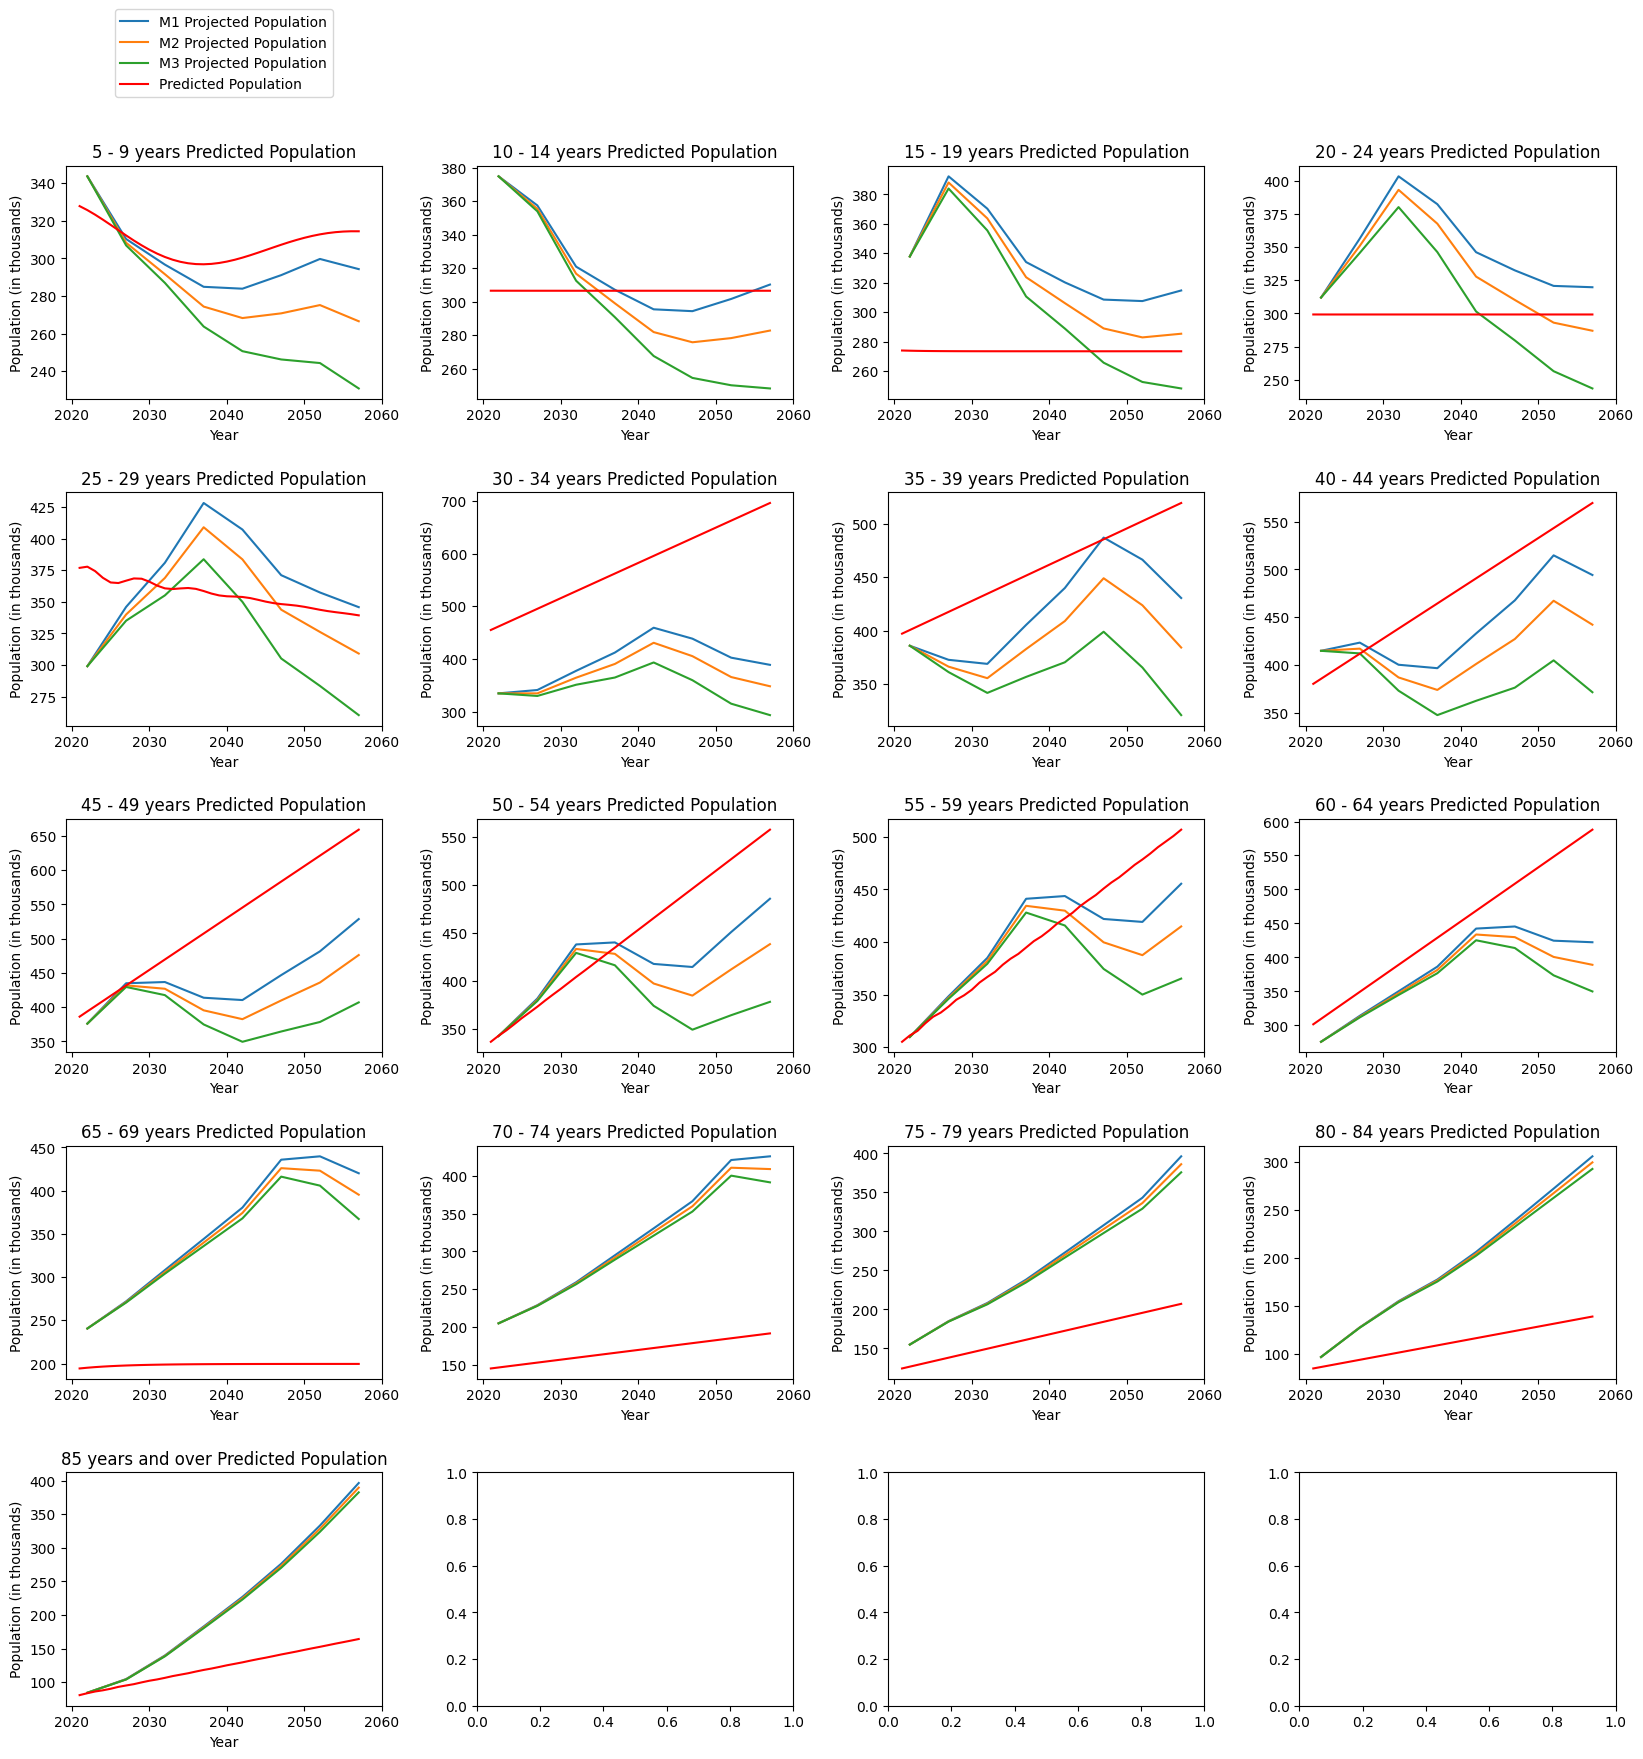

In [21]:
# Visualising predicted population against projected population

# Create a 4x5 grid for our 19 plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ag, prediction, ax in zip(age_groups[2:], predictions, axes):
    # Projected population (M1, M2, M3)
    ax.plot(m1[ag].index, m1[ag], label='M1 Projected Population')
    ax.plot(m2[ag].index, m2[ag], label='M2 Projected Population')
    ax.plot(m3[ag].index, m3[ag], label='M3 Projected Population')
    # Predicted population
    prediction = prediction[10:]
    ax.plot(prediction.index, prediction, label='Predicted Population', color='red')
    ax.set_title(f'{ag} Predicted Population')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population (in thousands)')
    ax.set_xticks(x_ticks)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.7))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

### Retraining models on the whole dataset

In [22]:
models_2 = {}
rmses_2 = []

# Using the whole dataset as the most recent data points are the most important
for ag in age_groups:
    y = df[ag]
    
    model = pm.auto_arima(y, seasonal=False, stepwise=True, trace=True, max_p=5, max_q=5, max_d=2, max_order=5)
    models_2[ag] = model
    
    forecast = model.predict(n_periods=len(test[ag]))
    
    forecasts.append(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=331.422, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=833.753, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=329.426, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=331.539, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=331.423, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=329.322, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=331.180, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=313.615, Time=0.08 sec
 ARIMA(1,0

In [23]:
# Making predictions from 2025 to 2057 inclusive
predictions = []
for ag in age_groups[2:]:
    prediction = models_2[ag].predict(n_periods=33)
    predictions.append(prediction)
    
x_ticks = pd.to_datetime(['2022', '2027', '2032', '2037', '2042', '2047', '2052', '2057'])

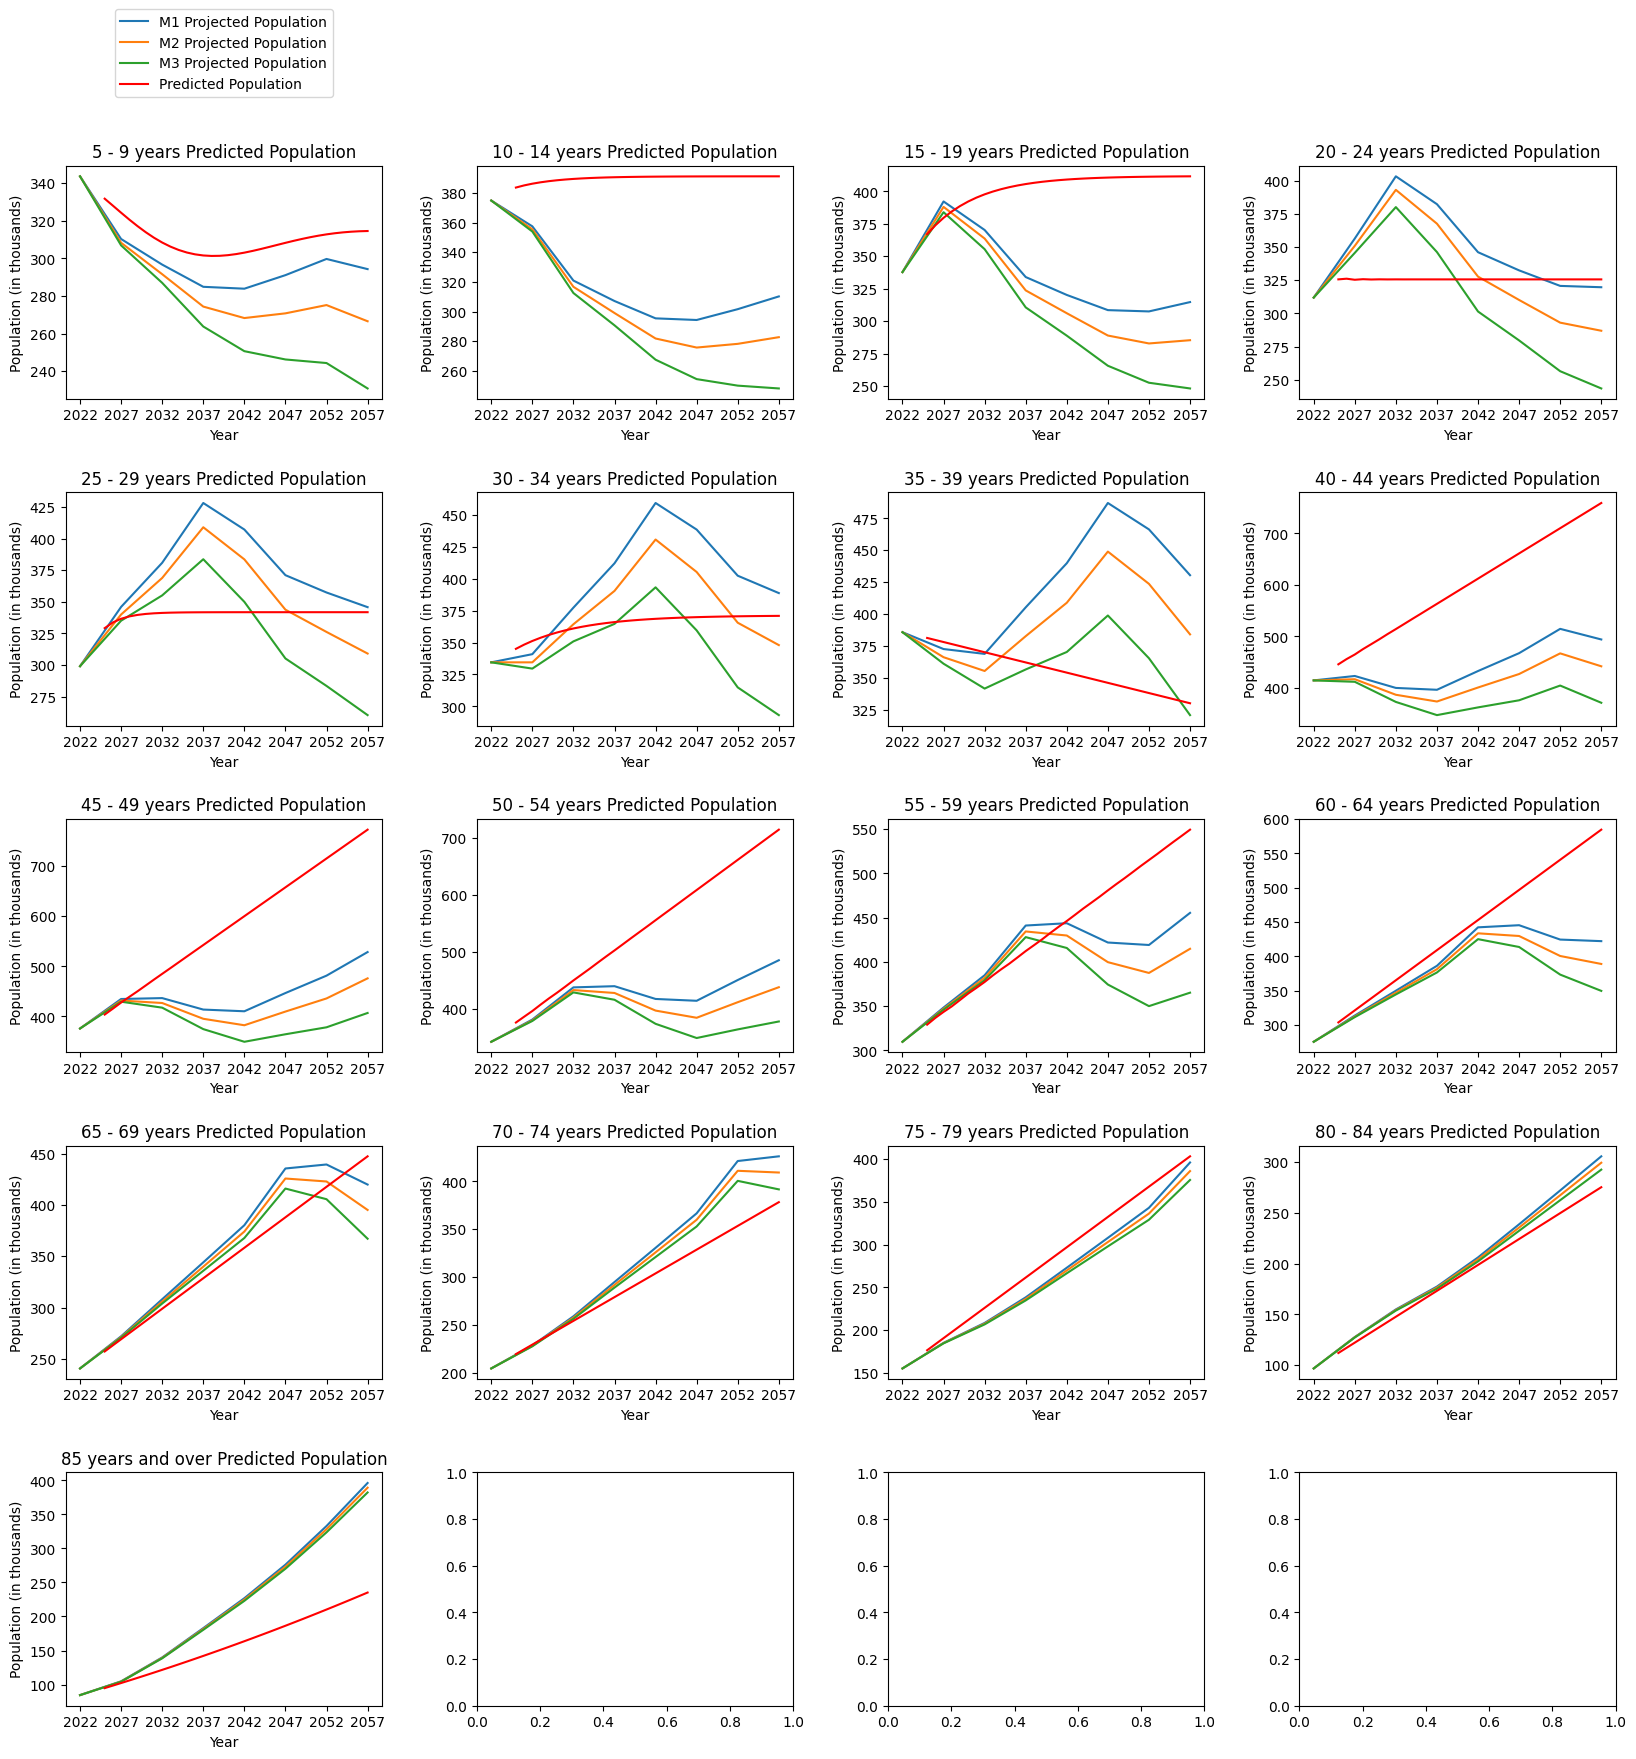

In [24]:
# Visualising predicted population against M1 projected population

# Create a 4x5 grid for our 19 plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ag, prediction, ax in zip(age_groups[2:], predictions, axes):
    # Projected population (M1, M2, M3)
    ax.plot(m1[ag].index, m1[ag], label='M1 Projected Population')
    ax.plot(m2[ag].index, m2[ag], label='M2 Projected Population')
    ax.plot(m3[ag].index, m3[ag], label='M3 Projected Population')
    # Predicted population
    ax.plot(prediction.index, prediction, label='Predicted Population', color='red')
    ax.set_title(f'{ag} Predicted Population')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population (in thousands)')
    ax.set_xticks(x_ticks)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.7))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()